# 🧪 Prueba de Hipótesis 1: IMC promedio en grupos con y sin diabetes

**Objetivo:** Verificar si el IMC promedio difiere significativamente entre personas diagnosticadas con diabetes y quienes no.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")

In [4]:
# Cargar datos
data = pd.read_csv('datasets/diabetes_health_indicators.csv')
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
# Revisar columnas y verificar variable objetivo y variable IMC
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
# Separar grupos
diabetes_yes = data[data['Diabetes_012'] == 1]['BMI']
diabetes_no = data[data['Diabetes_012'] == 0]['BMI']

print(f"N con diabetes: {len(diabetes_yes)}")
print(f"N sin diabetes: {len(diabetes_no)}")

N con diabetes: 4631
N sin diabetes: 213703


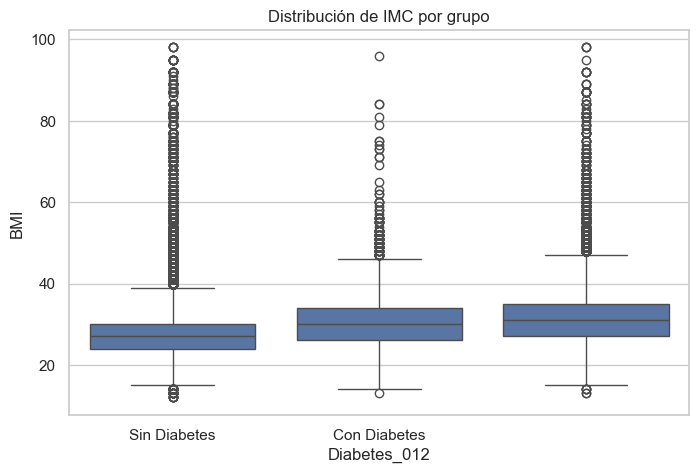

In [7]:
# Visualización: Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Diabetes_012'], y=data['BMI'])
plt.xticks([0,1], ['Sin Diabetes', 'Con Diabetes'])
plt.title('Distribución de IMC por grupo')
plt.show()

In [8]:
# Prueba de normalidad
_, p_yes = stats.shapiro(diabetes_yes.sample(500, random_state=42))
_, p_no = stats.shapiro(diabetes_no.sample(500, random_state=42))

print(f"p-valor normalidad (con diabetes): {p_yes:.4f}")
print(f"p-valor normalidad (sin diabetes): {p_no:.4f}")

p-valor normalidad (con diabetes): 0.0000
p-valor normalidad (sin diabetes): 0.0000


In [9]:
# Prueba de hipótesis: Test t de muestras independientes (varianzas iguales=False)
t_stat, p_val = stats.ttest_ind(diabetes_yes, diabetes_no, equal_var=False)
print(f"Estadístico t: {t_stat:.4f}")
print(f"p-valor: {p_val:.4f}")

if p_val < 0.05:
    print("Se rechaza H0: Hay diferencia significativa en IMC promedio.")
else:
    print("No se rechaza H0: No hay evidencia de diferencia significativa.")

Estadístico t: 28.8837
p-valor: 0.0000
Se rechaza H0: Hay diferencia significativa en IMC promedio.
